<a href="https://colab.research.google.com/github/kcalizadeh/phil_nlp/blob/master/non_neural_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# this cell mounts drive, sets the correct directory, then imports all functions
# and relevant libraries via the functions.py file
from google.colab import drive
import sys

# install relevent libraries not included with colab
!pip install lime
!pip install symspellpy

drive.mount('/gdrive',force_remount=True)

drive_path = '/gdrive/MyDrive/Colab_Projects/Phil_NLP'

sys.path.append(drive_path)

     |████████████████████████████████| 276kB 4.4MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp36-none-any.whl size=283846 sha256=960cab9e20900ab4bf88ec7cabd597076dfa3a54d9e8ed5a7a2f48373f7b7ab2
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime
     |████████████████████████████████| 2.6MB 6.0MB/s 
Mounted at /gdrive


In [3]:
from functions import *
%load_ext autoreload
%autoreload 2

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
df = pd.read_csv('/gdrive/MyDrive/Colab_Projects/Phil_NLP/phil_nlp.csv')

df.sample(5)

,Unnamed: 0,title,author,school,sentence_spacy,sentence_str,sentence_length,sentence_lowered
262843,292936,the system of ethics,fichte,german_idealism,"Reinhard Lauth, Hans Gliwitzky†, and Erich Fuc...","Reinhard Lauth, Hans Gliwitzky†, and Erich Fuc...",74,"reinhard lauth, hans gliwitzky†, and erich fuc..."
315372,351460,wealth of nations,smith,capitalism,Before the revolt of our North American coloni...,Before the revolt of our North American coloni...,110,before the revolt of our north american coloni...
65094,78050,complete works vol 1,aristotle,aristotle,"Nor is the opposite view reasonable, that the ...","Nor is the opposite view reasonable, that the ...",175,"nor is the opposite view reasonable, that the ..."
200705,226544,the order of things,foucault,continental,But it would be inadequate to express the fact...,But it would be inadequate to express the fact...,196,but it would be inadequate to express the fact...
206557,232712,writing and difference,derrida,continental,But the spirit of beginnings has not ceased to...,But the spirit of beginnings has not ceased to...,187,but the spirit of beginnings has not ceased to...


In [9]:
stopwords_list = stopwords.words('english') + list(string.punctuation) + ['“','”','...',"''",'’','``', "'", "‘"]
custom_stopwords = ['–', 'also', 'something', 'cf', 'thus', 'two', 'now', 'would', 'make', 'eb', 'u', 'well', 'even', 'said', 'eg', 'us',
                    'n', 'sein', 'e', 'da', 'therefore', 'however', 'would', 'thing', 'must', 'merely', 'way', 'since', 'latter', 'first',
                    'B', 'mean', 'upon', 'yet', 'cannot', 'c', 'C', 'let', 'may', 'might', "'s", 'b', 'ofthe', 'p.', '_', '-', 'eg', 'e.g.',
                    'ie', 'i.e.', 'f', 'l', "n't", 'e.g', 'i.e', '—', '--', 'hyl', 'phil', 'one'] + stopwords_list

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df['sentence_str'], df['school'])

In [11]:
tfidvectorizer = TfidfVectorizer(decode_error='ignore', stop_words=custom_stopwords)
tf_idf_data_train = tfidvectorizer.fit_transform(x_train)
tf_idf_data_test = tfidvectorizer.transform(x_test)

In [12]:
smote = SMOTE()
xtrain_smote, ytrain_smote = smote.fit_resample(tf_idf_data_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [13]:
nb_classifier_smote = MultinomialNB()
nb_classifier_smote.fit(xtrain_smote, ytrain_smote)
nb_test_smote_preds = nb_classifier_smote.predict(tf_idf_data_test)

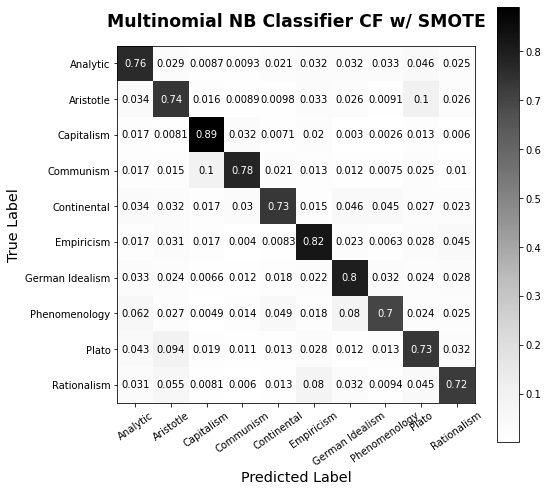

In [14]:
plot_pretty_cf(nb_classifier_smote, tf_idf_data_test, y_test, title='Multinomial NB Classifier CF w/ SMOTE')


In [15]:
print(classification_report(y_test, nb_test_smote_preds))

                 precision    recall  f1-score   support

       analytic       0.81      0.76      0.79     13292
      aristotle       0.78      0.74      0.76     12753
     capitalism       0.76      0.89      0.82      4664
      communism       0.78      0.78      0.78      4522
    continental       0.83      0.73      0.78      8539
     empiricism       0.65      0.82      0.73      5060
german_idealism       0.79      0.80      0.80     10617
  phenomenology       0.76      0.70      0.73      7107
          plato       0.69      0.73      0.71      9539
    rationalism       0.68      0.72      0.70      5825

       accuracy                           0.76     81918
      macro avg       0.75      0.77      0.76     81918
   weighted avg       0.76      0.76      0.76     81918

